In [ ]:
# Multicollinearity 

The multicollinearity  is the dependency of two o more explicatives variables in a model regression; specific, put away the Gauss-Markov condition. It's important to say that the dependency of the variables has to be strong to be consider a multicollinearity case. 

It can be consider two cases of multi:exact multicollinearity and approximately multicollinearity.

The first type of multicollinearity consists in a variable or variables depends linealy of other.


$$ 
Y_i = \beta_0 + X_1\beta_1 + X_2\beta_2 + X_3\beta_3 + \epsilon   ... (1) ;  
$$


$$
X_1 = 2.X_2 - 3.X_3
$$

For example, in the ecuacion 1 represents a exact multicollinearity case because a variable depends linealy of others. The real problem of this kind of multicollinearity it's that it wouldn't be possible estimate the coefficients of the regresors. Remember: 

$$
\hat{\beta} = (X'X)^{-1}(X'Y) ... (2)
$$

So, if exist multi. exact, the matrix $(X'X)$ will have determinant equal to zero, so it won't be invertible.  

The other case of multi: approximately multi consists in a variable of variables depends of other but no its exclusive a lineal combination. For example:

$$
Y_i = \beta_0 + X_1\beta_1 + X_2\beta_2 + X_3\beta_3 + \epsilon   ... (3) ;  
$$

$$
X_3 = 2X_1 + v_i, v_i \sim N(0, \sigma^2)
$$

The ecuation shows that $X_3$ its aproximaly a lineal combination of other variable; the problem with this case, its that matrix $(X'X)$ equation 2 will be approximately zero and the coeficient would be affected. 

* A way to solution the multicollinearity problem it's delete the variable that causes it. 

* Creating a 10x10 matrix but, 9 columns have to be part of normal distribution

In [75]:
using Random
Random.seed!(5)  # putting a seed to save the matrix
M = rand(Int8,(10,9))
M

10×9 Matrix{Int8}:
    2  -121    -8    96    78    68    80   -38   -24
 -126    92   -94   108  -115   102    93   -91   -91
  117    57   -69  -114    36   -37   -14    53    -9
   34   107   -34    83   -84   -17     6  -117   -47
   40    -1    53  -118    47   -16   -94   -63    69
  -79   -29  -125    70  -121   -55    61   123  -104
   55   -64   -19    18   108   124   -60   -49    51
   52   -90    79    43    -2    36   -23   -96    56
  -40    30  -112   -71   127  -128    11   -19   -97
 -126    74   -13   115    26   -26  -114   123    91

In [76]:
typeof(M)

Matrix{Int8} (alias for Array{Int8, 2})

* As wee can see, the matrix M before was created in base a random numbers, the next step is to make a 10th column as product of lineal combination of three columns of M, the lineal combination will be: 2*column1 - column2 + column3 = newcolumn

In [77]:
# Converting the columns of M in DataFrames to manipulate them
using DataFrames
M = DataFrame(M) 

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Int8,Int8,Int8,Int8,Int8,Int8,Int8,Int8,Int8
1,2,-121,-8,96,78,68,80,-38,-24
2,-126,92,-94,108,-115,102,93,-91,-91
3,117,57,-69,-114,36,-37,-14,53,-9
4,34,107,-34,83,-84,-17,6,-117,-47
5,40,-1,53,-118,47,-16,-94,-63,69
6,-79,-29,-125,70,-121,-55,61,123,-104
7,55,-64,-19,18,108,124,-60,-49,51
8,52,-90,79,43,-2,36,-23,-96,56
9,-40,30,-112,-71,127,-128,11,-19,-97


In [78]:
# c10 is the name of the new column

new = [2*M[:,1] - M[:,2] + M[:,3]] # the lineal combination
new = DataFrame(new) # converting to DataFrame
new

,x1
,Int64
1,117
2,-438
3,108
4,-73
5,134
6,-254
7,155
8,273
9,-222


In [79]:
# Adding the ten valors to the matrix M
M["10"] = [117,-438,108,-73,134,-254,155,273,-222,-339]
M

,x1,x2,x3,x4,x5,x6,x7,x8,x9,10
,Int8,Int8,Int8,Int8,Int8,Int8,Int8,Int8,Int8,Int64
1,2,-121,-8,96,78,68,80,-38,-24,117
2,-126,92,-94,108,-115,102,93,-91,-91,-438
3,117,57,-69,-114,36,-37,-14,53,-9,108
4,34,107,-34,83,-84,-17,6,-117,-47,-73
5,40,-1,53,-118,47,-16,-94,-63,69,134
6,-79,-29,-125,70,-121,-55,61,123,-104,-254
7,55,-64,-19,18,108,124,-60,-49,51,155
8,52,-90,79,43,-2,36,-23,-96,56,273
9,-40,30,-112,-71,127,-128,11,-19,-97,-222


In [80]:
# Dataframe to array to calculate the inverse
M = Tables.matrix(M)

10×10 Matrix{Int64}:
    2  -121    -8    96    78    68    80   -38   -24   117
 -126    92   -94   108  -115   102    93   -91   -91  -438
  117    57   -69  -114    36   -37   -14    53    -9   108
   34   107   -34    83   -84   -17     6  -117   -47   -73
   40    -1    53  -118    47   -16   -94   -63    69   134
  -79   -29  -125    70  -121   -55    61   123  -104  -254
   55   -64   -19    18   108   124   -60   -49    51   155
   52   -90    79    43    -2    36   -23   -96    56   273
  -40    30  -112   -71   127  -128    11   -19   -97  -222
 -126    74   -13   115    26   -26  -114   123    91  -339

In [81]:
M

10×10 Matrix{Int64}:
    2  -121    -8    96    78    68    80   -38   -24   117
 -126    92   -94   108  -115   102    93   -91   -91  -438
  117    57   -69  -114    36   -37   -14    53    -9   108
   34   107   -34    83   -84   -17     6  -117   -47   -73
   40    -1    53  -118    47   -16   -94   -63    69   134
  -79   -29  -125    70  -121   -55    61   123  -104  -254
   55   -64   -19    18   108   124   -60   -49    51   155
   52   -90    79    43    -2    36   -23   -96    56   273
  -40    30  -112   -71   127  -128    11   -19   -97  -222
 -126    74   -13   115    26   -26  -114   123    91  -339

In [82]:
# Calculating the inverse of M 
Mi = inv(M)

10×10 Matrix{Float64}:
 -2.41803e14   5.21519e13   3.53513e13  …   1.07761e14  -9.93755e12
  1.20901e14  -2.60759e13  -1.76756e13     -5.38804e13   4.96877e12
 -1.20901e14   2.60759e13   1.76756e13      5.38804e13  -4.96877e12
 -0.0168696    0.00125632   0.00091841      0.00793838   0.000808302
  0.014277    -0.00472507  -0.0036738      -0.00361106   0.000746486
  0.0315986   -0.00824406  -0.00998783  …  -0.0181856   -0.00184481
 -0.0612965    0.0233281    0.023551        0.0311071    0.00109136
  0.0137499   -0.00732049  -0.0049925      -0.00903128  -0.000318261
 -0.118533     0.0412012    0.0413006       0.0572266    0.00576384
  1.20901e14  -2.60759e13  -1.76756e13     -5.38804e13   4.96877e12

In [83]:
Mi = DataFrame(Mi)
Mi

,x1,x2,x3,x4,x5,x6,x7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-2.41803e14,5.21519e13,3.53513e13,-1.27742e14,-2.8132e14,-6.38468e13,5.04936e13
2,1.20901e14,-2.60759e13,-1.76756e13,6.38712e13,1.4066e14,3.19234e13,-2.52468e13
3,-1.20901e14,2.60759e13,1.76756e13,-6.38712e13,-1.4066e14,-3.19234e13,2.52468e13
4,-0.0168696,0.00125632,0.00091841,-0.00553721,-0.0248657,-0.00497436,0.00499005
5,0.014277,-0.00472507,-0.0036738,0.00715203,0.0120358,-0.000146362,-0.000961493
6,0.0315986,-0.00824406,-0.00998783,0.0185309,0.0382548,0.00840361,-0.00010989
7,-0.0612965,0.0233281,0.023551,-0.0437203,-0.0808974,-0.0223555,0.00218272
8,0.0137499,-0.00732049,-0.0049925,0.00825364,0.0140897,0.00435482,-0.000636522
9,-0.118533,0.0412012,0.0413006,-0.0779351,-0.141893,-0.0354035,0.0115277


* As we can se, Julia omitted 3 columns because the one of the columns of the matrix was a lineal combination, and if a matrix isn't a square one, it will have no have inverse. 

## Analyzing RCT data with Precision Adjustment

* Remember there are six ways of treatment; this section analyze the treatment group 2. 

In [76]:
import Pkg

In [167]:
# Pkg.add("FilePaths")
# Pkg.add("TypedTables")
# Pkg.add("MacroTools")
# Pkg.add("TexTables")
# Pkg.add("PlotlyJS")
# Pkg.add("Conda")
# Pkg.add("Gadfly")
# Pkg.add("KernelDensity")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("PyCall")

   Resolving package versions...
   Installed gdk_pixbuf_jll ── v2.42.6+1
   Installed Pango_jll ─────── v1.50.3+0
   Installed Graphics ──────── v1.1.1
   Installed NaNMath ───────── v0.3.7
   Installed PDMats ────────── v0.11.8
   Installed LogExpFunctions ─ v0.3.13
   Installed Parsers ───────── v2.3.1
   Installed Librsvg_jll ───── v2.52.4+0
   Installed DataAPI ───────── v1.10.0
   Installed Latexify ──────── v0.15.15
   Installed Rsvg ──────────── v1.0.0
   Installed Cairo ─────────── v1.0.5
   Installed Luxor ─────────── v3.2.0
    Updating `C:\Users\a2018\.julia\environments\v1.7\Project.toml`
  [ae8d54c2] + Luxor v3.2.0
    Updating `C:\Users\a2018\.julia\environments\v1.7\Manifest.toml`
  [159f3aea] + Cairo v1.0.5
  [9a962f9c] ↑ DataAPI v1.9.0 ⇒ v1.10.0
  [a2bd30eb] + Graphics v1.1.1
  [23fbe1c1] ↑ Latexify v0.15.14 ⇒ v0.15.15
  [2ab3a3ac] ↑ LogExpFunctions v0.3.12 ⇒ v0.3.13
  [ae8d54c2] + Luxor v3.2.0
  [77ba4419] ↓ NaNMath v1.0.0 ⇒ v0.3.7
  [90014a1f] ↑ PDMats v0.11.7 ⇒ v0.

In [192]:
 using GLM, StatsModels
 using DataTables
 using DelimitedFiles, DataFrames, Lasso
 using FilePaths
 using StatsModels, Combinatorics
 using CategoricalArrays
 using StatsBase, Statistics
 using TypedTables
 using MacroTools
 using NamedArrays
 using PrettyTables 
 using TexTables
 using PlotlyJS
 using Plots 
 using StatsPlots
 using Gadfly
 using Random, Distributions
 using Random
 using PyCall
 using Distributions
 using KernelDensity


### Plotting two histograms for treatment and control groups

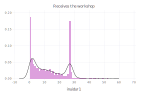

In [174]:
# Loading data

mat, head = readdlm("../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

# Filter observations when tg = 2

tg_two = filter(row -> row[:tg] in [2], df) 

first(tg_two,20)


Gadfly.plot(tg_two, 
    layer(x = "inuidur1", Geom.density , color=[colorant"black"]),
    layer(x = "inuidur1", Geom.histogram(bincount=60, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Receives the workshop")
)

* Rember that variable 'tg' represents the treatment; in this case, we are going to analyze the group 2

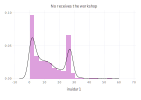

In [175]:
# Loading data to filter 0 in treatment group 2

mat, head = readdlm("../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

# Filter observations when tg = 0

no_tg = filter(row -> row[:tg] in [0], df) 

first(no_tg,20)

Gadfly.plot(tg_two, 
    layer(x = "inuidur1", Geom.density , color=[colorant"black"]),
    layer(x = "inuidur1", Geom.histogram(bincount=20, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("No receives the workshop ")
)

## Loading data

In [176]:

mat, head = readdlm("../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

# Filter control group and just treatment group number 2

sample = filter(row -> row[:tg] in [2,0], df) 

first(sample,20)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0
2,10635.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0
5,10754.0,2.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0


In [177]:
# Treatment group n°2
replace!(sample.tg, 2 => 1) 
rename!(sample, "tg" => "T2")


# from float to string
sample[!,:dep] = string.(sample[!,:dep]) 

# dep varaible in categorical format 
sample[!,:dep] = categorical(sample[!,:dep]) 

describe(sample) 

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,,,Float64
2,T2,0.419924,0.0,0.0,1.0,,,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,,,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,,,Float64
5,female,0.400726,0.0,0.0,1.0,,,Float64
6,black,0.118817,0.0,0.0,1.0,,,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,,,Float64
8,othrace,0.00518852,0.0,0.0,1.0,,,Float64
9,dep,,0.0,,2.0,3,,"CategoricalValue{String, UInt32}"


### MODELS 

In [178]:
# Previous: Carry out covariate balance check

# couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)



In [179]:
# linear regression

reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, sample))
m1 = lm(reg1, sample)
table = regtable( "Covariate Balance Check" => m1) # coeficientes, standar error, squared R, N (sample size )

                   | Covariate Balance Check 
                   |           (1)           
---------------------------------------------
       (Intercept) |                0.517*** 
                   |                 (0.158) 
            female |                   0.006 
                   |                 (0.130) 
             black |                  0.100* 
                   |                 (0.060) 
           othrace |                   0.173 
                   |                 (0.301) 
          dep: 1.0 |                   0.158 
                   |                 (0.186) 
          dep: 2.0 |                  -0.193 
                   |                 (0.163) 
                q2 |                  -0.109 
                   |                 (0.159) 
                q3 |                  -0.108 
                   |                 (0.159) 
                q4 |                  -0.062 
                   |                 (0.159) 
                q5 |              

## Model specification

In [180]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), sample)

table1 = regtable( "No adjustment model" => ols_cl)   

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |                5782 
      $R^2$ |               0.001 


* The results of this models shows $ Log( unemploymentWeeks) = 2.05 - 0.07.Treatment $ . So, a person that was offered with the workshop in case 2 reduce in 7,9% ($ -0.079x100% $) the length (in weeks) of the first spell of unemployment.

In [181]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, sample))

ols_cra = lm(reg2, sample)
table2 = regtable("CRA model" => ols_cra)

                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.447*** 
                   |   (0.381) 
                T2 |  -0.071** 
                   |   (0.032) 
            female | -0.943*** 
                   |   (0.314) 
             black | -0.508*** 
                   |   (0.146) 
           othrace |    -0.039 
                   |   (1.140) 
          dep: 1.0 |     0.280 
                   |   (0.451) 
          dep: 2.0 |     0.168 
                   |   (0.394) 
                q2 |     0.027 
                   |   (0.385) 
                q3 |    -0.354 
                   |   (0.384) 
                q4 |    -0.338 
                   |   (0.384) 
                q5 |    -0.178 
                   |   (0.383) 
                q6 |    -0.446 
                   |   (0.381) 
           agelt35 |    -0.326 
                   |   (0.326) 
           agegt54 |    -0.155 
                   |   (0.580) 
        

* In this model (with controls), the effect of T2 is a the same that in the model before. 

In [182]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    

# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,sample)
X = desv_mean(X) # matrix format 

5782×119 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852   0.883431  …   0.945002   -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0

In [183]:
Y = select(sample, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(sample, [:T2])).*X))  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model (IRA)

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)

table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression  

            | Interactive model 
            |        (1)        
--------------------------------
(Intercept) |          2.057*** 
            |           (0.021) 
         T2 |          -0.072** 
            |           (0.032) 
         x1 |            -0.666 
            |           (0.445) 
         x2 |         -0.863*** 
            |           (0.270) 
         x3 |            -1.735 
            |           (2.173) 
         x4 |             0.036 
            |           (0.685) 
         x5 |             0.212 
            |           (0.497) 
         x6 |            -0.255 
            |           (0.527) 
         x7 |            -0.621 
            |           (0.526) 
         x8 |            -0.480 
            |           (0.526) 
         x9 |            -0.372 
            |           (0.524) 
        x10 |            -0.677 
            |           (0.521) 
        x11 |            -0.678 
            |           (0.435) 
        x12 |            -0.304 
          

In [184]:
X = StatsModels.modelmatrix(reg2.rhs,sample)
X = desv_mean(X)


D = DataFrame([X[:,1]])  # Treatment variable

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]))  # Join Controls (X) + T2*X "interactive"

Y = select(sample, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)





#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

5782-element Vector{Float64}:
 2.8903717578961645
 1.9459101490553132
 0.0
 3.295836866004329
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.1972245773362196
 3.295836866004329
 3.295836866004329
 2.70805020110221
 1.0986122886681098
 3.332204510175204
 ⋮
 2.302585092994046
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.70805020110221
 0.0
 3.1354942159291497
 1.791759469228055
 2.6390573296152584
 2.1972245773362196
 1.3862943611198906
 3.295836866004329

## Coeficient Plot

In [185]:
#Pkg.add("StatsPlots")
#Pkg.add("GraphRecipes")

   Resolving package versions...
  No Changes to `C:\Users\a2018\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\a2018\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
   Installed Inflate ─────── v0.1.2
   Installed SimpleTraits ── v0.9.4
   Installed NetworkLayout ─ v0.4.4
   Installed AbstractTrees ─ v0.3.4
   Installed ArnoldiMethod ─ v0.2.0
   Installed GeometryTypes ─ v0.8.5
   Installed GraphRecipes ── v0.5.9
   Installed Graphs ──────── v1.6.0
    Updating `C:\Users\a2018\.julia\environments\v1.7\Project.toml`
  [bd48cda9] + GraphRecipes v0.5.9
    Updating `C:\Users\a2018\.julia\environments\v1.7\Manifest.toml`
  [1520ce14] + AbstractTrees v0.3.4
  [ec485272] + ArnoldiMethod v0.2.0
  [4d00f742] + GeometryTypes v0.8.5
  [bd48cda9] + GraphRecipes v0.5.9
  [86223c79] + Graphs v1.6.0
  [d25df0c9] + Inflate v0.1.2
  [46757867] + NetworkLayout v0.4.4
  [699a6c99] + SimpleTraits v0.9.4
Precompiling project...
  ✓ Inflate
  ✓ AbstractTrees
  ✓ 

In [186]:
ira_female = coef(ols_ira)[122]
ira_black = coef(ols_ira)[123]
ira_dep = coef(ols_ira)[125]
ira_agelt35 = coef(ols_ira)[131]
ira_female_sd = stderror(ols_ira)[122]
ira_black_sd = stderror(ols_ira)[123]
ira_dep_sd = stderror(ols_ira)[125]
ira_agelt35_sd = stderror(ols_ira)[131]

0.36128006413601005

In [188]:
coeff = [ira_female,ira_black,ira_dep,ira_agelt35]
std = [ira_female_sd,ira_black_sd,ira_dep_sd,ira_agelt35_sd]
labels = ["T2*Female","T2*Black","T2*agelt35","T2*factor(dep)1"]

4-element Vector{String}:
 "T2*Female"
 "T2*Black"
 "T2*agelt35"
 "T2*factor(dep)1"

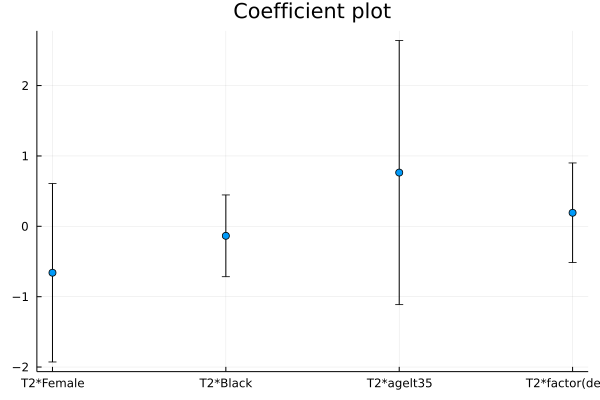

In [189]:
Plots.scatter(labels, coeff, legend = false, yerror = 1.96 .* std, title = "Coefficient plot")

* It can be seen according to the graph that the estimators for the variables of female sex, brown tea, age greater than 35 and categorical by state, are ambiguous and do not provide certainty about the effects of the number of weeks unemployed, because within the 95% confidence interval is the value 0.

## Using HDMJL

In [16]:
include("../hdmjl/hdmjl.jl")

In [17]:
lm(Matrix(X), vec(Matrix(D)))

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}:

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────────────
                Coef.     Std. Error                 t  Pr(>|t|)        Lower 95%        Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────────────
x1        2.11061e-12    1.05442e-11              0.20    0.8414     -1.85601e-11      2.27813e-11
x2       -1.36682e-12    7.05248e-12             -0.19    0.8463     -1.51924e-11      1.24588e-11
x3     -194.425          1.27445e-9   -152556073183.05    <1e-99   -194.425         -194.425
x4       -8.49941e-12    1.57988e-11             -0.54    0.5906     -3.94713e-11      2.24725e-11
x5       -1.41114e-11    1.36223e-11             -1.04    0.3003     -4.08164e-11      1.25936e-11
x6        0.0          NaN                      NaN       NaN       NaN              N

In [18]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true ) # creo que el erro está acá

rlasso_arg(5782×238 DataFrame. Omitted printing of 233 columns
│ Row  │ x1        │ x2        │ x3          │ x4        │ x5        │
│      │ Float64   │ Float64   │ Float64     │ Float64   │ Float64   │
├──────┼───────────┼───────────┼─────────────┼───────────┼───────────┤
│ 1    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ 0.839329  │
│ 2    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 3    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 4    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 5    │ 0.599274  │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 6    │ -0.400726 │ -0.118817 │ -0.00518852 │ 0.883431  │ -0.160671 │
│ 7    │ 0.599274  │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 8    │ 0.599274  │ -0.118817 │ -0.00518852 │ 0.883431  │ -0.160671 │
│ 9    │ 0.599274  │ -0.118817 │ -0.00518852 │ 0.883431  │ -0.160671 │
│ 10   │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
⋮
│ 5772 │ -0.

In [30]:
D_resid = rlasso(D_reg_0)

LoadError: MethodError: no method matching rlasso(::rlasso_arg, ::Symbol)
[0mClosest candidates are:
[0m  rlasso(::rlasso_arg) at C:\Users\a2018\ECO224\GitHub\hdmjl\hdmjl.jl:380

In [31]:
D_resid = rlasso(D_reg_0)["residuals"]

LoadError: MethodError: no method matching DataFrame(::Vector{Vector}, ::Symbol)
[0mClosest candidates are:
[0m  DataFrame(::AbstractVector{<:AbstractVector}, [91m::AbstractVector{<:AbstractString}[39m; makeunique, copycols) at C:\Users\a2018\.julia\packages\DataFrames\GtZ1l\src\dataframe\dataframe.jl:249
[0m  DataFrame(::AbstractVector{<:AbstractVector}, [91m::AbstractVector{Symbol}[39m; makeunique, copycols) at C:\Users\a2018\.julia\packages\DataFrames\GtZ1l\src\dataframe\dataframe.jl:242
[0m  DataFrame(::AbstractVector, [91m::AbstractVector{<:AbstractString}[39m; makeunique, copycols) at C:\Users\a2018\.julia\packages\DataFrames\GtZ1l\src\dataframe\dataframe.jl:237
[0m  ...

In [32]:
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

rlasso_arg(5782×238 DataFrame. Omitted printing of 233 columns
│ Row  │ x1        │ x2        │ x3          │ x4        │ x5        │
│      │ Float64   │ Float64   │ Float64     │ Float64   │ Float64   │
├──────┼───────────┼───────────┼─────────────┼───────────┼───────────┤
│ 1    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ 0.839329  │
│ 2    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 3    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 4    │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 5    │ 0.599274  │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 6    │ -0.400726 │ -0.118817 │ -0.00518852 │ 0.883431  │ -0.160671 │
│ 7    │ 0.599274  │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
│ 8    │ 0.599274  │ -0.118817 │ -0.00518852 │ 0.883431  │ -0.160671 │
│ 9    │ 0.599274  │ -0.118817 │ -0.00518852 │ 0.883431  │ -0.160671 │
│ 10   │ -0.400726 │ -0.118817 │ -0.00518852 │ -0.116569 │ -0.160671 │
⋮
│ 5772 │ -0.

In [33]:
Y_resid = rlasso(Y_reg_0)["residuals"]

LoadError: MethodError: no method matching DataFrame(::Vector{Vector}, ::Symbol)
[0mClosest candidates are:
[0m  DataFrame(::AbstractVector{<:AbstractVector}, [91m::AbstractVector{<:AbstractString}[39m; makeunique, copycols) at C:\Users\a2018\.julia\packages\DataFrames\GtZ1l\src\dataframe\dataframe.jl:249
[0m  DataFrame(::AbstractVector{<:AbstractVector}, [91m::AbstractVector{Symbol}[39m; makeunique, copycols) at C:\Users\a2018\.julia\packages\DataFrames\GtZ1l\src\dataframe\dataframe.jl:242
[0m  DataFrame(::AbstractVector, [91m::AbstractVector{<:AbstractString}[39m; makeunique, copycols) at C:\Users\a2018\.julia\packages\DataFrames\GtZ1l\src\dataframe\dataframe.jl:237
[0m  ...

In [34]:
D_resid = reshape(D_resid, length(D_resid), 1)

LoadError: UndefVarError: D_resid not defined

In [35]:
Lasso_ira = lm(D_resid, Y_resid)

LoadError: UndefVarError: D_resid not defined

## Replication: codes R and Python in Julia

##### Links 

https://www.kaggle.com/code/victorchernozhukov/py-notebook-vaccine-rcts/notebook

https://www.kaggle.com/code/victorchernozhukov/r-notebook-some-rct-examples/notebook


## Polio RCT

One of the earliest randomized experiments were the Polio vaccination trias conducted by the Public Health Service in 1954. The question was whether Salk vaccine prevented polio. Children in the study were randomly assigned either a treatment (polio vaccine shot) or a placebo (saline solution shot), without knowing which one they received. The doctors in the study, making the diagnosis, did not know whether a child received a vaccine or not. In other words, the trial was a double-blind, randomized control trial. The trial had to be large, because the rate at which Polio occured in the population was 50 per 100,000. The treatment group saw 33 polio cases per 200,745; the control group saw 115 cases per 201,229. The estimated avearage treatment effect is about $$ -40 $$ with the 95% confidence band (based on approximate normality of the two sample means and their differences): $$ [-52, -28]. $$ As this is an RCT, the confidence band suggests that the Polio vaccine caused the reduction in the risk of polio.

The interesting thing here is that we don't need the underlying individual data to evaluate the effectivess of the vaccine. This is because the outcomes are Bernoulli random variables, and we have enough information to compute the estimate of ATE as well as the confidence intervals from the group case counts.

We also compute the Vaccine Efficacy metric, which refers to the following measure according to the CDC: $$ VE = \frac{Risk for Unvaccinated - Risk for Vaccinated}{Risk for Unvaccinated} $$ It describes the relative reduction in risk caused by vaccination.

It is staighforward to get the VE estimate by just plugging-in the numbers, but how do we get the approximate variance estimate? I am too lazy to do calculations for the delta method, so I will just use a simulation (a form of approximate bootstrap) to obtain the confidence intervals.



In [211]:
# Definitions

NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

0.0005714882049803955

In [212]:
#incidence per 100000 

println("Incidence per 100000 among treated: " ,YT*100000)

Incidence per 100000 among treated: 16.438765598146905


In [213]:
println( "Incidence per 100000 among controlled: ", YC*100000)

Incidence per 100000 among controlled: 57.14882049803955


In [214]:
# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

println("Estimate TE of occurances per 100,000 " ,delta_hat)

Estimate TE of occurances per 100,000 -40.71005489989265


In [215]:
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

println("Standard deviation for ATE: ",  Var_delta_hat^.5)


Standard deviation for ATE: 6.047412320702958


In [216]:
# here we are using the fact that outcomes are Bernoulli 
a1 = delta_hat -1.96*Var_delta_hat^.5
a2 = delta_hat +1.96*Var_delta_hat^.5

CI_delta = [a1 , a2]

println("95 % confidence interval is [ " , a1 , ",", a2 , "]")

95 % confidence interval is [ -52.56298304847044,-28.85712675131485]


In [217]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745
NU =  201229
RV = 33/NV
RU = 115/NU
VE = (RU - RV)/RU
println("Overall VE is ", VE)

Overall VE is 0.7123516206478694


In [218]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [219]:
# set-up MC draws:

# First, RVs
Random.seed!(1)
dist_norm_rv = rand(Normal(0, 1), 10000)
dist_var_rv = dist_norm_rv*(Var_RV) 
exp = [5]
dist_var_exp_rv = (dist_var_rv).^(exp) 
RVs =  dist_var_exp_rv.*(1+ RV)  

10000-element Vector{Float64}:
 -6.446760923238761e-52
  1.5604795869877989e-47
 -1.2583660711461045e-46
  3.294995659607488e-44
  7.8928094854857e-46
  5.0463633829504764e-49
  6.038717153280788e-45
 -1.4151146245433296e-46
 -4.536728096536519e-46
 -1.4213448020914025e-48
 -9.598569850106902e-48
  8.49904120763496e-46
  9.444273392056364e-48
  ⋮
 -5.214280409131222e-45
  3.035436881250501e-46
  8.507580915259668e-58
  4.1657176318442265e-46
  1.0213373977383049e-50
 -3.8956051808649747e-51
 -4.2011890654008044e-51
  6.568673024338936e-45
 -2.2673407516682327e-46
 -7.417669156651312e-46
  3.7852287405219016e-48
 -1.7110214513747192e-51

In [220]:
# Second, RUs

Random.seed!(2) # diferent seed
dist_norm_ru = rand(Normal(0, 1), 10000)
dist_var_ru = dist_norm_ru*(Var_RU) 
exp = [5]
dist_var_exp_ru = (dist_var_ru).^(exp) 
RUs =  dist_var_exp_ru.*(1+RU)

10000-element Vector{Float64}:
 -1.1457955703749153e-54
  2.9010720291112407e-42
 -2.351697989262055e-43
  1.162331243799339e-44
 -1.2337490058478258e-45
  1.910277244102336e-43
 -6.227970367448255e-43
 -2.588799069590196e-45
  2.023303620944303e-44
 -9.90028799755831e-43
 -8.75086872876589e-43
 -2.7510288918686304e-43
  9.529791967882849e-43
  ⋮
 -4.227093953131801e-42
  9.511907665266785e-43
  2.2172187129777715e-46
  3.159299956210304e-42
 -7.968221487517058e-44
  4.990025417208458e-45
 -1.9179177904933079e-44
 -1.5889590735591516e-41
  5.429834959385976e-43
  1.9161079932884687e-43
  7.460838436747837e-45
 -8.011121932608548e-53

In [221]:
VEs= (RUs .- RVs)./RUs # funcionó
typeof(VEs)

Vector{Float64} (alias for Array{Float64, 1})

In [222]:
# VEs to DataFrame
DF_VEs = DataFrame([VEs], [:VEs])
DF_VEs

,VEs
,Float64
1,-561.645
2,0.999995
3,0.999465
4,-1.83482
5,1.63974
6,0.999997
7,1.0097
8,0.945337
9,1.02242


In [223]:
np = pyimport("numpy")
CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [-736.6071520721274,616.0190177019693]

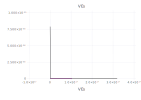

In [230]:
Gadfly.plot(DF_VEs, 
    layer(x = "VEs", Geom.density , color=[colorant"black"]),
    layer(x = "VEs", Geom.histogram(bincount= 3, density=true, limits=(min=1000,)),
    color=[colorant"plum"]),
    Guide.title("VEs")
)

## Pfizer/BNTX Covid-19 RCT

Pfizer/BNTX was the first vaccine approved for emergency use to reduce the risk of Covid-19 decease. In studies to assess vaccine efficacy, volunteers were randomly assigned to receive either a treatment (2-dose vaccination) or a placebo, without knowing which they recieved. The doctors making the diagnoses did not know now whether a given volunteer received a vaccination or not. The results of the study are given in the following table.
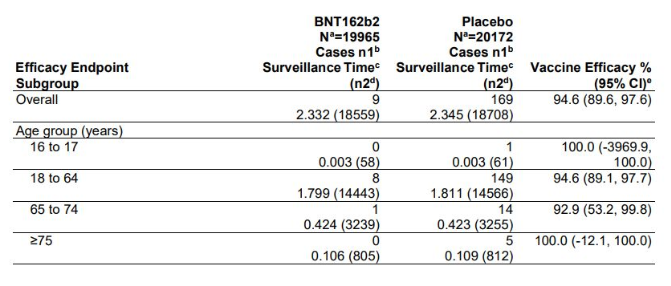


Here we see both the overall effects and the effects by age group. The confidence intervals for the overall ATE are tight and suggest high effectiveness of the vaccine. The confidence intervals for the age group 65-75 are much wider due to the relatively small number of people in this group. We could group 65-75 and >75 groups to evaluate the effectiveness of the vaccine for this broader age group and narrow the width of the confidence band.

We use the same approach as that for the Polio example. This gives slightly different results than the FDA result, because the FDA used inversion of exact binomial tests to construct confidence intervals. We use asymptotic approches based on approximate normality, which is more crude, but delivers a rather similar result.

In [84]:
# Its almost the same sequence of the Polio RTC 

NV =  19965; # number vaccinated
NU =  20172; # number unvaccinated
RV = 9/NV; # average outcome for vaccinated
RU = 169/NU; # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy

# incidence per 100000

println("Incidence per 100000 among vaccinated: ", RV*10000)



Incidence per 100000 among vaccinated: 4.507888805409467


In [85]:
println("Incidence per 100000 among unvaccinated: ", RU*10000)

Incidence per 100000 among unvaccinated: 83.77949633154869


In [86]:
# treatment effect - estimated reduction in incidence per 100000 people
delta_hat = 100000*(RV-RU)
println("Estimated ATE of occurances per 100,000 is: ",  delta_hat)

Estimated ATE of occurances per 100,000 is: -792.7160752613921


In [87]:
# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli
Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU
Var_delta_hat =  100000^2*(Var_RV + Var_RU)
Std_delta_hat = sqrt(Var_delta_hat)

print("Standard deviation for ATE is: ", Std_delta_hat )

Standard deviation for ATE is: 65.91015718590171

In [88]:
b1 = delta_hat -1.96*sqrt(Var_delta_hat)
b2 = delta_hat +1.96*sqrt(Var_delta_hat)
println("95% confidence interval of ATE is [", b1, ",", 
            b2 , "]"   )

95% confidence interval of ATE is [-921.8999833457594,-663.5321671770248]


In [89]:
print("Overall VE is: ", VE)

Overall VE is: 0.9461934124362605

In [90]:
# set-up MC draws:

# First, RVs
Random.seed!(11)
dist_norm_rv = rand(Normal(0, 1), 10000)
dist_var_rv = dist_norm_rv*(Var_RV) 
exp = [5]
dist_var_exp_rv = (dist_var_rv).^(exp) 
RVs =  dist_var_exp_rv.*(1+ RV)  

10000-element Vector{Float64}:
  8.172167497737487e-40
  2.898665570546404e-38
 -1.2761248353945817e-38
 -8.368241966377653e-39
 -1.3627735869036455e-37
 -7.3174494289381e-48
 -3.5927652948769277e-38
  4.1393433072794076e-39
  2.4436120758415832e-39
 -5.388739856503964e-41
  4.503135088342519e-39
 -7.729177628206814e-39
  7.057728275754659e-42
  ⋮
 -1.4621255510394663e-44
  3.532731360967998e-39
  2.0028934904255056e-40
  2.1637293972742957e-39
  1.7980046002756155e-40
 -2.958339805139204e-37
 -9.498884147758074e-39
  4.123460570778442e-44
 -6.805581995203462e-39
  4.996358967042409e-38
  5.578879284142397e-38
  4.677265131876826e-38

In [91]:
# Second, RUs

Random.seed!(12) # diferent seed
dist_norm_ru = rand(Normal(0, 1), 10000)
dist_var_ru = dist_norm_ru*(Var_RU) 
exp = [5]
dist_var_exp_ru = (dist_var_ru).^(exp) 
RUs =  dist_var_exp_ru.*(1+RU)

10000-element Vector{Float64}:
  5.337331662703839e-35
  1.4243076105019805e-32
 -8.334756121763339e-32
  1.6360032678268415e-30
 -5.350051832870953e-33
 -9.044785400455404e-35
 -1.8638277966861204e-39
  2.3604132392989214e-31
 -4.507799540771774e-34
  5.175820052360683e-33
  2.5158558536055122e-33
  4.10781327501028e-32
  2.4633632165548043e-32
  ⋮
  4.647383069938337e-35
 -2.7288017920130343e-42
  1.7666455337273824e-31
 -1.0704950542486228e-34
  1.9709325051122374e-32
  1.3291915350566514e-35
  9.899993655092768e-33
 -2.1126847084152506e-33
 -3.8501054335986465e-31
  2.42685911935243e-32
 -3.139392115278255e-33
  5.245277190635854e-37

In [116]:
VEs= (RUs .- RVs)./RUs 
#typeof(VEs)

10000-element Vector{Float64}:
    0.9999846886646472
    0.9999979648598735
    0.9999998468911607
    1.0000000051150522
    0.9999745278432906
    0.9999999999999192
  -18.27627273970724
    0.9999999824634804
    1.0000054208534648
    1.000000010411374
    0.9999982100981335
    1.0000001881579592
    0.9999999997134922
    ⋮
    1.0000000003146128
 1295.6090006639529
    0.9999999988662732
    1.0000202124184383
    0.9999999908773912
    1.0222566855649824
    1.0000009594838621
    1.0000000000195177
    0.9999999823236477
    0.9999979412241414
    1.0000177705717517
    0.9108290189081536

In [151]:
np = pyimport("numpy")
CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.8383034531459558,1.168469408294753]

In [141]:
# VEs to DataFrame
DF_VEs = DataFrame([VEs], [:VEs])
DF_VEs

,VEs
,Float64
1,0.999985
2,0.999998
3,1.0
4,1.0
5,0.999975
6,1.0
7,-18.2763
8,1.0
9,1.00001


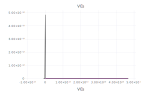

In [210]:
Gadfly.plot(DF_VEs, 
    layer(x = "VEs", Geom.density , color=[colorant"black"]),
    layer(x = "VEs", Geom.histogram(bincount= 1, density=true, limits=(min=1000,)),
    color=[colorant"plum"]),
    Guide.title("VEs")
)